<a href="https://colab.research.google.com/github/Maffyo/Maffyo/blob/main/Predicitive_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import files

uploaded = files.upload()

Saving Wprld population growth rate by cities 2024.csv to Wprld population growth rate by cities 2024.csv


In [2]:
import pandas as pd

In [18]:
df = pd.read_csv('Wprld population growth rate by cities 2024.csv')

In [19]:
df.head(5)

,City,Country,Continent,Population (2024),Population (2023),Growth Rate
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021
1,Delhi,India,Asia,33807403,32941309,0.0263
2,Shanghai,China,Asia,29867918,29210808,0.0225
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083


In [34]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [35]:
X = df[["City", "Country", "Continent", "Population (2023)", "Growth Rate"]]
y = df["Population (2024)"]

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Define preprocessing for numeric and categorical data
numeric_features = ["Population (2023)", "Growth Rate"]
categorical_features = ["City", "Country", "Continent"]

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [41]:
# Preprocess numeric features (scaling) and categorical features (one-hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [44]:
# Create a pipeline with preprocessing and Linear Regression
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

In [45]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Population (2023)',
                                                   'Growth Rate']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['City', 'Country',
                                                   'Continent'])])),
                ('model', LinearRegression())])

In [46]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 18960.553998789306


In [49]:
# Test different models for improvement
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

for name, model in models.items():
    # Create a new pipeline for each model
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # Cross-validation to assess performance
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=5)
    print(f"{name} MAE: {-scores.mean():.4f}")

Linear Regression MAE: 38207.0853
Ridge Regression MAE: 25456.6897
Lasso Regression MAE: 24557.1202


In [50]:
# Predict the population for the year 2025 based on the previous population and growth rate
df['Predicted_Population_2025'] = df["Population (2024)"] * (1 + df["Growth Rate"])

In [51]:
df.head(5)

,City,Country,Continent,Population (2024),Population (2023),Growth Rate,Predicted_Population_2025
0,Tokyo,Japan,Asia,37115035,37194105,-0.0021,3.703709e+07
1,Delhi,India,Asia,33807403,32941309,0.0263,3.469654e+07
2,Shanghai,China,Asia,29867918,29210808,0.0225,3.053995e+07
3,Dhaka,Bangladesh,Asia,23935652,23209616,0.0313,2.468484e+07
4,Sao Paulo,Brazil,South America,22806704,22619736,0.0083,2.299600e+07


In [69]:
plot_df = pd.DataFrame({
    'Country': df['Country'],
    '2023': df['Population (2023)'],
    '2024': df['Population (2024)'],
    '2025 (Predicted)': df['Predicted_Population_2025']
})

In [77]:
plot_df.head(5)

df_top_10 = plot_df.head(10)

In [71]:
import matplotlib.pyplot as plt



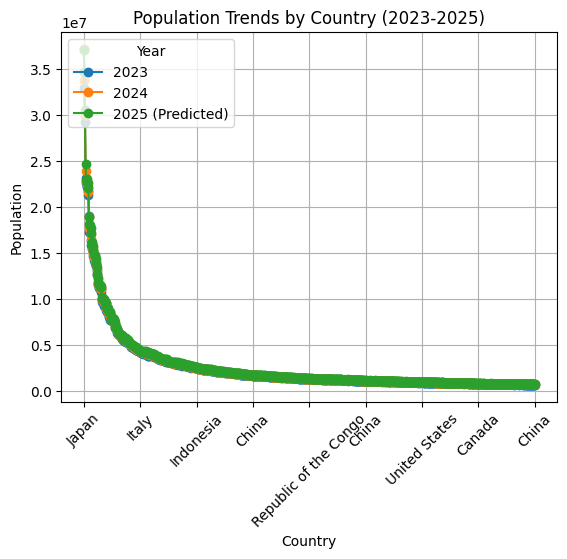

In [72]:
plot_df.set_index('Country', inplace=True)

# Plot the lines for each year
plot_df.plot(kind='line', marker='o')

# Set plot labels and title
plt.title("Population Trends by Country (2023-2025)")
plt.xlabel("Country")
plt.ylabel("Population")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate country labels for better readability
plt.legend(title="Year", loc='upper left')

# Show the plot
plt.show()

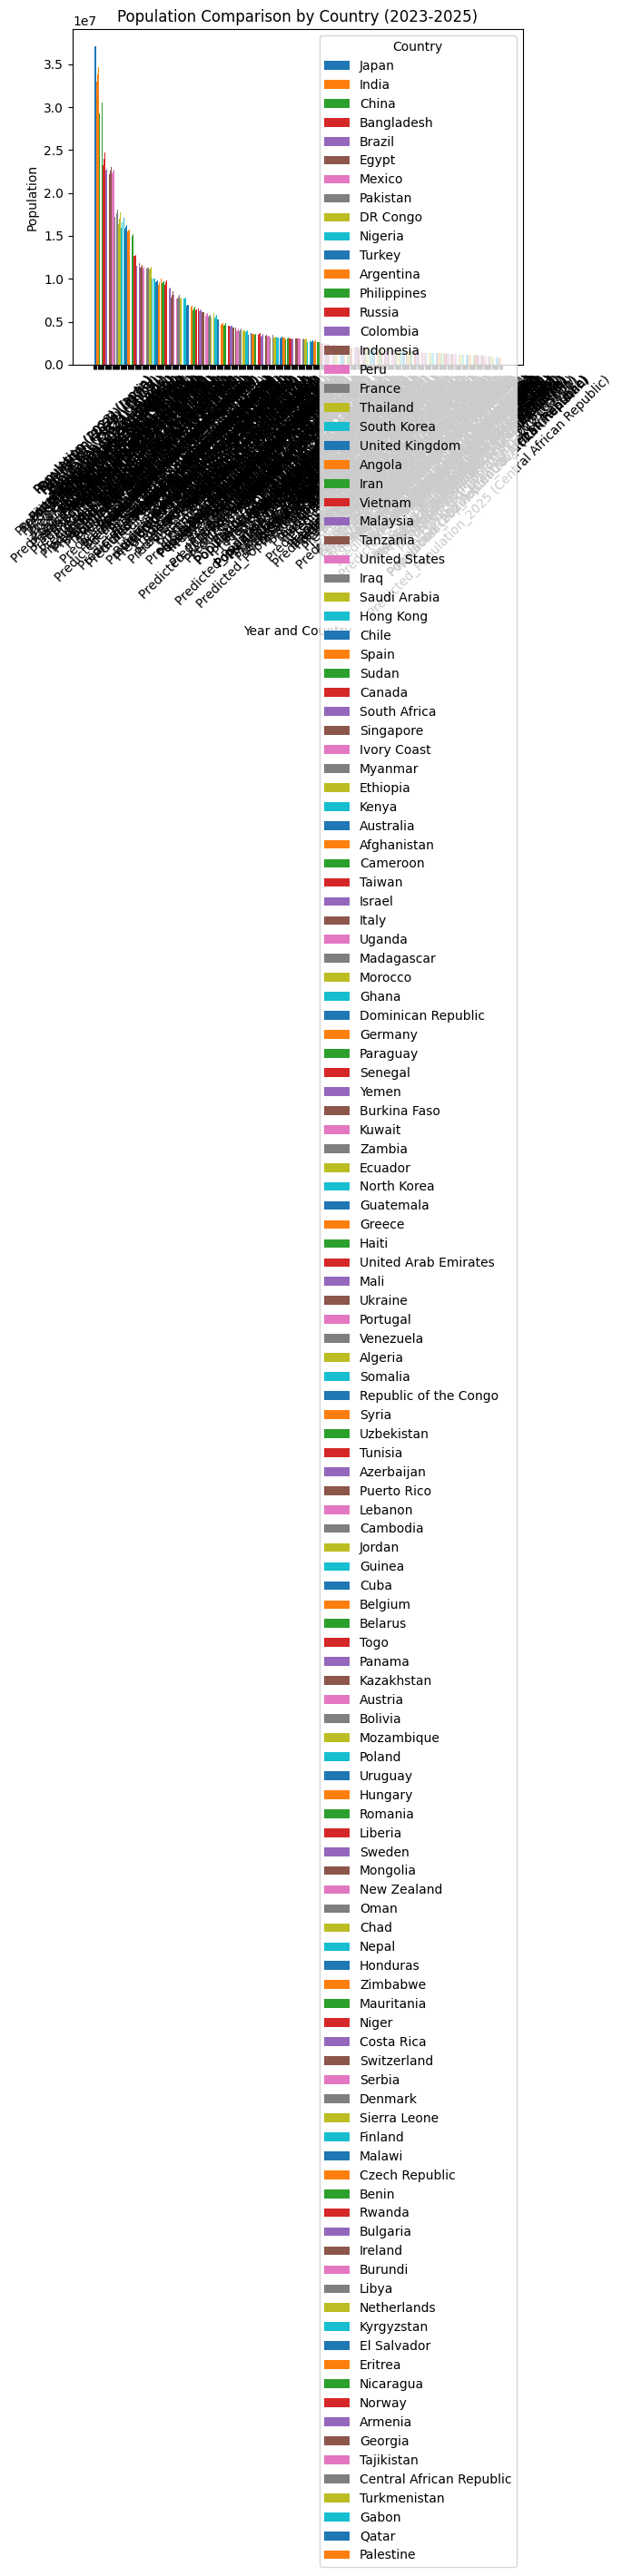

In [75]:
plot_df_melted = df.melt(id_vars=['Country'], value_vars=['Population (2023)', 'Population (2024)', 'Predicted_Population_2025'],
                         var_name='Year', value_name='Population')

# Plot the bar plot

for country in plot_df_melted['Country'].unique():
    country_data = plot_df_melted[plot_df_melted['Country'] == country]
    plt.bar(country_data['Year'] + " (" + country + ")", country_data['Population'], label=country)

# Set plot labels and title
plt.title("Population Comparison by Country (2023-2025)")
plt.xlabel("Year and Country")
plt.ylabel("Population")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Country")

# Show the plot
plt.show()

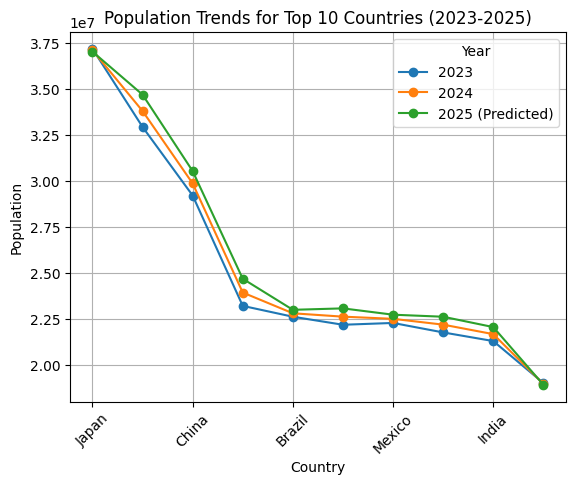

In [79]:
df_top_10 = df.head(10)

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Country': df_top_10['Country'],
    '2023': df_top_10['Population (2023)'],
    '2024': df_top_10['Population (2024)'],
    '2025 (Predicted)': df_top_10['Predicted_Population_2025']
})

# Set the index to 'Country' for better plotting
plot_df.set_index('Country', inplace=True)

# Plot the lines for each year
plot_df.plot(kind='line', marker='o')

# Set plot labels and title
plt.title("Population Trends for Top 10 Countries (2023-2025)")
plt.xlabel("Country")
plt.ylabel("Population")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate country labels for better readability
plt.legend(title="Year", loc='upper right')

# Show the plot
plt.show()

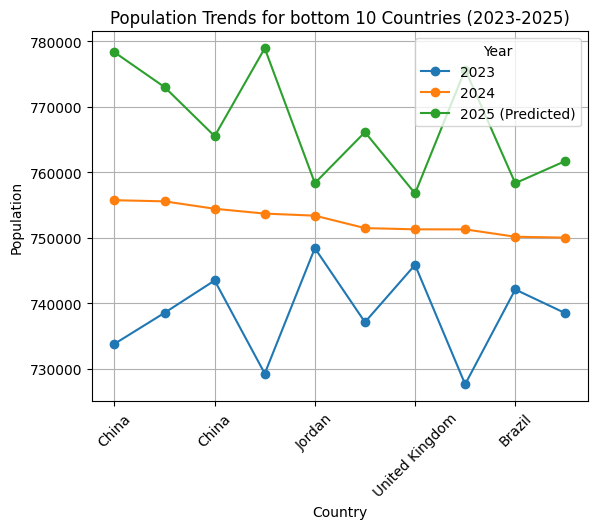

In [80]:
df_tail_10 = df.tail(10)

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Country': df_tail_10['Country'],
    '2023': df_tail_10['Population (2023)'],
    '2024': df_tail_10['Population (2024)'],
    '2025 (Predicted)': df_tail_10['Predicted_Population_2025']
})

# Set the index to 'Country' for better plotting
plot_df.set_index('Country', inplace=True)

# Plot the lines for each year
plot_df.plot(kind='line', marker='o')

# Set plot labels and title
plt.title("Population Trends for bottom 10 Countries (2023-2025)")
plt.xlabel("Country")
plt.ylabel("Population")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate country labels for better readability
plt.legend(title="Year", loc='upper right')

# Show the plot
plt.show()

In [81]:
df_tail_10

,City,Country,Continent,Population (2024),Population (2023),Growth Rate,Predicted_Population_2025
791,Zhangjiagang,China,Asia,755752,733810,0.0299,778348.9848
792,Nanded Waghala,India,Asia,755577,738552,0.0231,773030.8287
793,Xianyang Shaanxi,China,Asia,754446,743491,0.0147,765536.3562
794,Amara,Iraq,Asia,753708,729276,0.0335,778957.2180
795,Zarqa,Jordan,Asia,753392,748428,0.0066,758364.3872
796,Bhavnagar,India,Asia,751493,737128,0.0195,766147.1135
797,Sheffield,United Kingdom,Europe,751303,745876,0.0073,756787.5119
798,Huambo,Angola,Africa,751297,727641,0.0325,775714.1525
799,Ribeirao Preto,Brazil,South America,750174,742115,0.0109,758350.8966
800,Panzhihua,China,Asia,750036,738495,0.0156,761736.5616
